# Resultados para el Objetivo 2

{'ciencia de datos': 10, 'react': 9, 'redes neuronales': 8, 'ia': 7, 'flutter': 6, 'machine learning': 5, 'computer vision': 2, 'desarrollo web': 2, 'angular': 1, 'procesamiento del lenguaje natural': 1, 'apps moviles': 1, 'devops': 1, 'flask': 1, 'three.js': 1, 'c': 1, 'django': 1, 'cloud computing': 1, 'typescript': 1, 'gestión de datos': 1, 'deep learning': 1, 'docker': 1, 'vr': 1, 'algoritmos': 1, 'sistemas distribuidos': 1, 'mobile': 1, 'ti': 1, 'modelos predictivos': 1, 'php': 1, 'neovim': 1}
{'ciencia de datos': '14.3 %', 'react': '12.9 %', 'redes neuronales': '11.4 %', 'ia': '10.0 %', 'flutter': '8.6 %', 'machine learning': '7.1 %'}


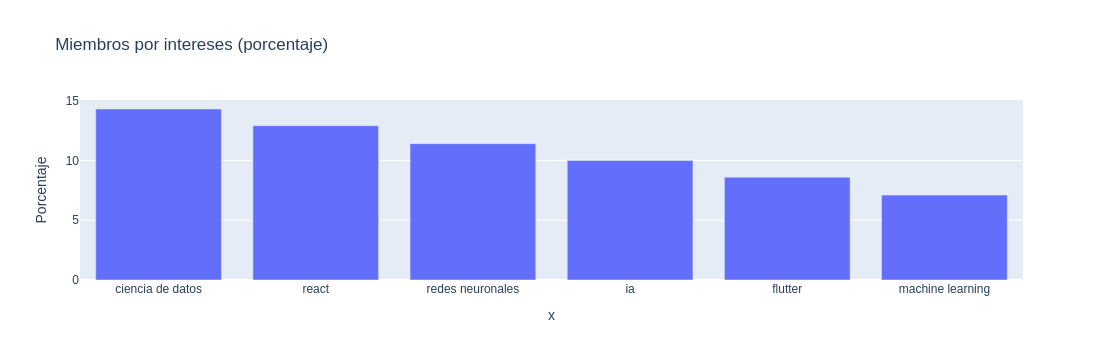

In [13]:
import pandas as pd
import plotly.express as px

file = "./Base de Datos Miembros Taws.xlsx"

hoja = pd.read_excel(file, sheet_name='Intereses', engine='openpyxl')
hoja2 = pd.read_excel(file, sheet_name='Miembro_Tema', engine='openpyxl')

# Diccionario de sinónimos
sinonimos = {
    'redes neuronales': 'redes neuronales',
    'redes neuronales convolucionales': 'redes neuronales',
    'ciencia de datos': 'ciencia de datos',
    'análisis de datos': 'ciencia de datos',
    'machine learning': 'machine learning',
    'deep learnig': 'deep learning'
}

dic = {}
for id, tema in hoja.iterrows():
    x = str(tema.iloc[1]).lower()
    if x in sinonimos:
        x = sinonimos[x]
    dic[x] = 0

for id, tema in hoja2.iterrows():
    x = str(tema.iloc[1]).lower()
    if x in sinonimos:
        x = sinonimos[x]
    if x in dic:
        dic[x] += 1

def obtener_valor(item):
    return item[1]

diccionario_ordenado = dict(sorted(dic.items(), key=obtener_valor, reverse=True))
print(diccionario_ordenado)

# Calcular el total de temas
total_temas = sum(diccionario_ordenado.values())

# Calcular el porcentaje de cada tema y formatearlo
dic_porcentajes = {clave: f"{round((valor / total_temas) * 100, 1)} %" for clave, valor in diccionario_ordenado.items()}

# Filtrar temas con porcentaje >= 3%
dicnuew = {clave: valor for clave, valor in dic_porcentajes.items() if float(valor.split()[0]) >= 3}

print(dicnuew)
fig = px.bar(x=list(dicnuew.keys()), y=[float(valor.split()[0]) for valor in dicnuew.values()], title="Miembros por intereses (porcentaje)")
fig.update_layout(yaxis_title="Porcentaje")
fig.show()